In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

In [23]:
x,y=make_moons(n_samples=1000,noise=0.2)

In [24]:
dataset={'x1':x[:,0], 'x2':x[:,1], 'y':y}

In [25]:
df

,x1,x2,y
0,-1.111335,0.268906,0
1,-0.052763,0.987441,0
2,-0.712805,0.523622,0
3,0.808518,0.646930,0
4,0.512581,0.587184,0
...,...,...,...
495,0.211304,0.833056,0
496,-1.042013,0.139082,0
497,-0.367628,0.839428,0
498,1.753621,0.212270,1


In [26]:
df=pd.DataFrame(dataset)

In [27]:
df

,x1,x2,y
0,0.653228,0.568967,0
1,0.285146,0.844093,0
2,1.715786,-0.730122,1
3,0.307569,0.314226,1
4,-0.089698,1.062091,0
...,...,...,...
995,-0.393186,0.752615,0
996,0.883856,0.503746,0
997,-0.026010,0.250720,1
998,1.024186,-0.511913,1


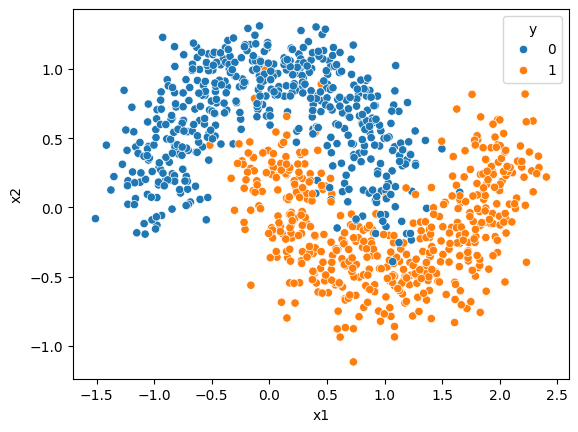

In [28]:
sns.scatterplot(data=df, x='x1', y='x2', hue='y')
plt.show()

In [31]:
x_a=df.iloc[:,:-1]
x_a

,x1,x2
0,0.653228,0.568967
1,0.285146,0.844093
2,1.715786,-0.730122
3,0.307569,0.314226
4,-0.089698,1.062091
...,...,...
995,-0.393186,0.752615
996,0.883856,0.503746
997,-0.026010,0.250720
998,1.024186,-0.511913


In [32]:
y_a=df['y']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [36]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [39]:
dt=DecisionTreeClassifier()


In [42]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
dt.score(x_test, y_test),dt.score(x_train, y_train)

(0.935, 1.0)

In [45]:
sv=SVC()
sv.fit(x_train, y_train)

SVC()

In [47]:
sv.score(x_test,y_test), sv.score(x_train  , y_train)

(0.95, 0.96375)

In [48]:
gb=GaussianNB()
gb.fit(x_train, y_train)

GaussianNB()

In [49]:
gb.score(x_test, y_test), gb.score(x_train, y_train)

(0.875, 0.86375)

In [51]:
from sklearn.ensemble import VotingClassifier

In [52]:
li=[('dt',DecisionTreeClassifier()),('sv', SVC()), ('gb', GaussianNB())]

In [61]:
vc=VotingClassifier(li, weights=[10,4,7])
vc.fit(x_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()), ('sv', SVC()),
                             ('gb', GaussianNB())],
                 weights=[10, 4, 7])

In [62]:
vc.score(x_test, y_test)*100, vc.score(x_train, y_train)*100

(94.5, 96.75)

# How to Predict Voting Classifier

In [64]:
predict= {'dt':dt.predict(x_test), 'sv':sv.predict(x_test), 'gnb':gb.predict(x_test),'vc':vc.predict(x_test) }

In [70]:
df=pd.DataFrame(predict)

In [71]:
df

,dt,sv,gnb,vc
0,1,1,1,1
1,0,0,0,0
2,1,1,1,1
3,0,0,0,0
4,1,1,1,1
...,...,...,...,...
195,0,0,0,0
196,0,0,0,0
197,1,1,0,1
198,1,1,1,1
